In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 피마 인디언 당뇨 예측 

In [2]:
#names 로 헤더 지정
df=pd.read_csv("pima-indians-diabetes.csv",names=["pregnant","plasma","pressure","thickness","insulin","BMI","pedigree","age","class"])

In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
print(df[['pregnant','class']].groupby(['pregnant'],as_index=False).mean().sort_values(by='pregnant',ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


<AxesSubplot:>

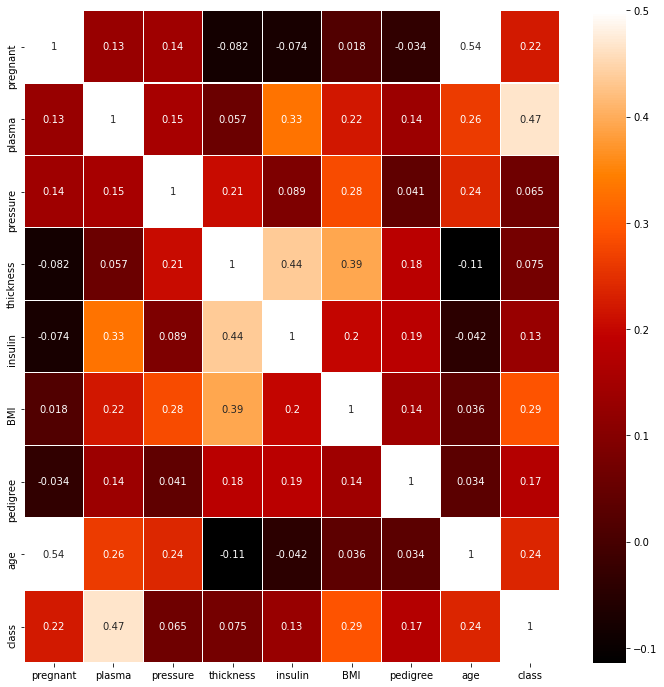

In [8]:
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)

linewidths : 각 셀을 구분한 선의 굵기

vmax,vmin : 컬러 맵을 고정하는 값. 그렇지 않으면 데이터 및 다른 키워드 인수에서 유추

cmap : 데이터 값에서 색 공간으로의 매핑, 설정하지 않으면 기본값은 중심 설정 여부에 따라 다름.

linecolor : 구분선 색상

annot : data값을 각 셀에 표시

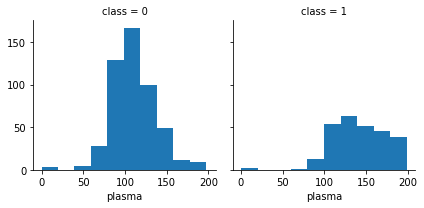

In [9]:
#상관계수가 가장 높은 plasma 확인

grid=sns.FacetGrid(df,col='class')   #FacetGrid : 다중 클래스를 표현 하기 위한 그래프
grid.map(plt.hist,'plasma',bins=10)
plt.show()

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
dataset=np.loadtxt("pima-indians-diabetes.csv",delimiter=",")
X=dataset[:,:-1]
Y=dataset[:,[-1]]

In [16]:
X.shape,Y.shape

((768, 8), (768, 1))

In [19]:
#정확도를 높이기 위한 극단적 오버피팅
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(X,Y,epochs=1000,batch_size=100)

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.9247 - accuracy: 0.5703
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.1853 - accuracy: 0.5612
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.6315
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6419
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6745
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.6966
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7044
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7148
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7240
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7188
Epoch 11/1000
8/8 [

8/8 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7747
Epoch 84/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7812
Epoch 85/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.7969
Epoch 86/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.7969
Epoch 87/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8086
Epoch 88/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8125
Epoch 89/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7669
Epoch 90/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7878
Epoch 91/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8138
Epoch 92/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8021
Epoch 93/1000
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8724
Epoch 165/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8672
Epoch 166/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8398
Epoch 167/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8633
Epoch 168/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.8854
Epoch 169/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8893
Epoch 170/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8620
Epoch 171/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.8893
Epoch 172/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8620
Epoch 173/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8633
Epoch 174/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.1998 - accuracy: 0.9141
Epoch 247/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9271
Epoch 248/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1723 - accuracy: 0.9297
Epoch 249/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9193
Epoch 250/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.9271
Epoch 251/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9388
Epoch 252/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1424 - accuracy: 0.9453
Epoch 253/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9479
Epoch 254/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.9297
Epoch 255/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9492
Epoch 256/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9557
Epoch 328/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9622
Epoch 329/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9766
Epoch 330/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9714
Epoch 331/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9779
Epoch 332/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9779
Epoch 333/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9740
Epoch 334/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9727
Epoch 335/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9661
Epoch 336/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9740
Epoch 337/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9805
Epoch 410/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9857
Epoch 411/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9883
Epoch 412/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9831
Epoch 413/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9844
Epoch 414/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 0.9896
Epoch 415/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9844
Epoch 416/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9831
Epoch 417/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9818
Epoch 418/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9844
Epoch 419/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.1640 - accuracy: 0.9219
Epoch 491/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9440
Epoch 492/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9414
Epoch 493/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9622
Epoch 494/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9740
Epoch 495/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9766
Epoch 496/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9857
Epoch 497/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9922
Epoch 498/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9935
Epoch 499/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9948
Epoch 500/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9935
Epoch 573/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9922
Epoch 574/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9935
Epoch 575/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9935
Epoch 576/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9948
Epoch 577/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9961
Epoch 578/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9974
Epoch 579/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9974
Epoch 580/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9961
Epoch 581/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9909
Epoch 582/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9948
Epoch 655/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 0.9948
Epoch 656/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9922
Epoch 657/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9948
Epoch 658/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9974
Epoch 659/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9961
Epoch 660/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 661/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9987
Epoch 662/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 663/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 664/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 0.9974
Epoch 737/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9974
Epoch 738/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9987
Epoch 739/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 740/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 741/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 742/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 743/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 744/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9974
Epoch 745/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.9987
Epoch 746/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 818/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 819/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 820/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 821/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 822/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 823/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 824/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 825/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 826/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 827/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 0.9987
Epoch 899/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9987
Epoch 900/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.9987
Epoch 901/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 902/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 903/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 904/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 905/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 906/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 907/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 908/1000


8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 981/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 982/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 983/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 984/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 985/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 986/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 987/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 988/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 989/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 990/1000


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_6 (Dense)              (None, 300)               3900      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 301       
Total params: 184,909
Trainable params: 184,909
Non-trainable params: 0
_________________________________________________________________


In [22]:
print("\n Accuracy : %.4f" % (model.evaluate(X,Y)[1]))

24/24 [==============================] - 0s 914us/step - loss: 0.0048 - accuracy: 0.9987

 Accuracy : 0.9987


In [23]:
model.evaluate(X,Y)

24/24 [==============================] - 0s 828us/step - loss: 0.0048 - accuracy: 0.9987


[0.0047691334038972855, 0.9986979365348816]

## Iris 분류

In [24]:
iris=sns.load_dataset("iris")

In [25]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


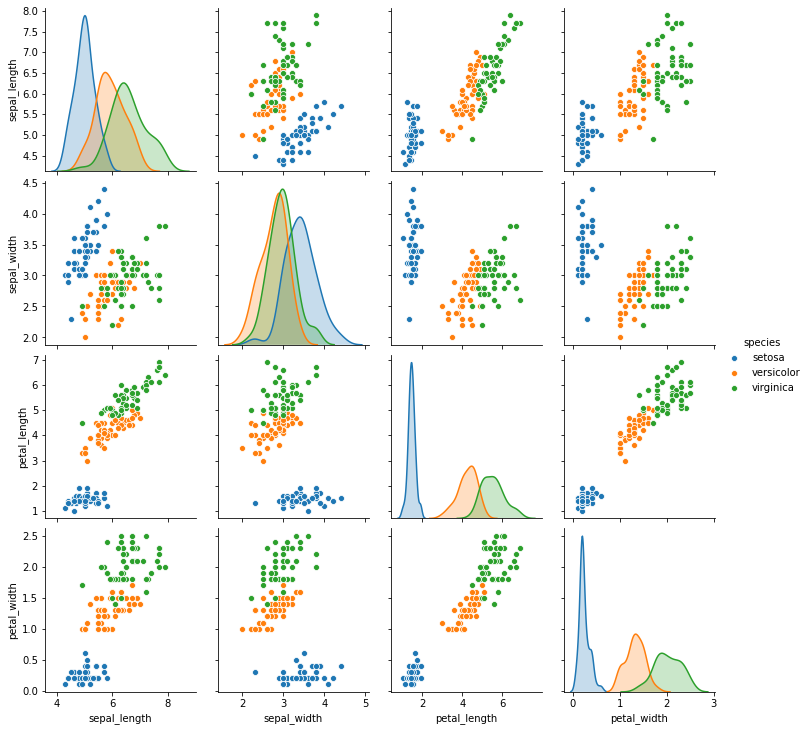

In [31]:
sns.pairplot(iris,hue="species")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

In [33]:
dataset=iris.values
dataset

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [50]:
X=dataset[:,0:4].astype(float)
Y_obj=dataset[:,[4]]

X.shape,Y_obj.shape

((150, 4), (150, 1))

In [55]:
#문자열을 숫자로 변환
e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [57]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
Y_encoded=utils.to_categorical(Y) #원핫인코딩

In [59]:
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [60]:
model=Sequential()
model.add(Dense(16,input_dim=4,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X,Y_encoded,epochs=50,batch_size=1)

print("\n Accuracy : %.4f" % (model.evaluate(X,Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 0s 538us/step - loss: 0.8855 - accuracy: 0.5600
Epoch 2/50
150/150 [==============================] - 0s 521us/step - loss: 0.7213 - accuracy: 0.6933
Epoch 3/50
150/150 [==============================] - 0s 534us/step - loss: 0.6110 - accuracy: 0.8000
Epoch 4/50
150/150 [==============================] - 0s 480us/step - loss: 0.5363 - accuracy: 0.8400
Epoch 5/50
150/150 [==============================] - 0s 509us/step - loss: 0.4884 - accuracy: 0.8600
Epoch 6/50
150/150 [==============================] - 0s 518us/step - loss: 0.4478 - accuracy: 0.8733
Epoch 7/50
150/150 [==============================] - 0s 445us/step - loss: 0.4056 - accuracy: 0.8933
Epoch 8/50
150/150 [==============================] - 0s 542us/step - loss: 0.3747 - accuracy: 0.9133
Epoch 9/50
150/150 [==============================] - 0s 524us/step - loss: 0.3594 - accuracy: 0.9267
Epoch 10/50
150/150 [==============================] - 0s 506us/step - loss: 0.330